In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<class 'nibabel.nifti1.Nifti1Image'>


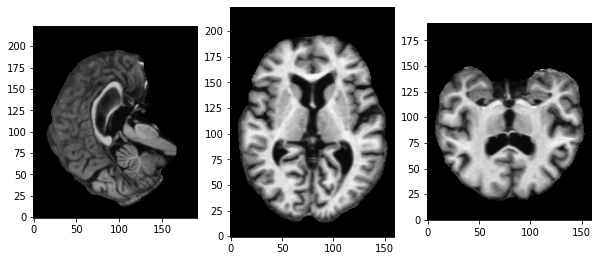

In [43]:
path = "/content/drive/MyDrive/project/VoxelMorph-torch-master"
os.chdir(path)

import nibabel as nb
import numpy as np
import os
import matplotlib.pyplot as plt

img_path = '/content/drive/MyDrive/project/nii/OASIS_OAS1_0001_MR1/aligned_norm.nii.gz'
img = nb.load(img_path)

print(type(img))

def show_slices(slices):
   fig, axes = plt.subplots(1, len(slices),figsize = (10, 5))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")

def slices_of_3d_img(img):
  if isinstance(img, nb.nifti1.Nifti1Image):
    slice_0 = img.get_fdata()[img.shape[0]//2, :, :]
    slice_1 = img.get_fdata()[:, img.shape[1]//2, :]
    slice_2 = img.get_fdata()[:, :, img.shape[2]//2]
  if isinstance(img, np.ndarray):
    slice_0 = img[int(img.shape[0]//2), :, :]
    slice_1 = img[:, int(img.shape[1]//2), :]
    slice_2 = img[:, :, int(img.shape[2]//2)]
  return [slice_0, slice_1, slice_2]

show_slices(slices_of_3d_img(img))

In [70]:
x,y,z = img.get_fdata().shape
scale=[128.0/x,128.0/y,128.0/z]

scale

[0.8, 0.6666666666666666, 0.5714285714285714]

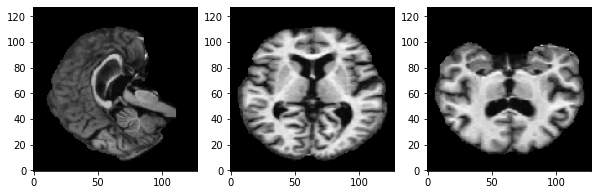

In [72]:
import scipy.ndimage
def resize_data_volume_by_scale(data, scale):
   """
   Resize the data based on the provided scale
   """
   #scale_list = [scale,scale,scale]
   return scipy.ndimage.interpolation.zoom(data, scale, order=0)


result1 = resize_data_volume_by_scale(img.get_fdata(),scale)

show_slices(slices_of_3d_img(result1))


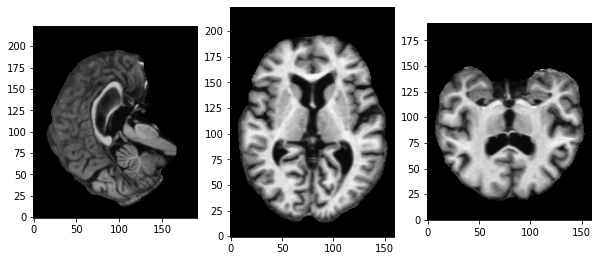

In [73]:
show_slices(slices_of_3d_img(img))